# An Introduction to Japanese Text Mining: Part One

![Japanese Text Mining](images/japanese_text_mining.jpg)
Check out the [Emory University workshop blog](https://scholarblogs.emory.edu/japanese-text-mining/) on Japanese Text Mining. The example notebook cells below repeat the steps in the [tutorial](http://history.emory.edu/RAVINA/JF_text_mining/Guides/Jtextmining_intro_part1.html) of Mark Ravina using python instead of R.

## Imports

In [1]:
import pandas as pd
import plotly_express as px

## Data Structures

Pandas `DataFrame` is the main python analogue of `R`'s `dataframe`.

In [2]:
meiroku_zasshi_url = 'http://history.emory.edu/RAVINA/JF_text_mining/Guides/data/meiroku_zasshi.txt'
Meiroku_df = pd.read_csv(meiroku_zasshi_url, sep=' ')

In [3]:
Meiroku_df.head()

,year,issue,title,author,text
1,1874,1,洋字を以て国語を書するの論,西周,洋字 を 以 て 國語 を 書する の 論 西 周 吾輩 日常 二三 朋友 の 盍簪 に...
2,1874,1,開化の度に因て改文字を発すべきの論,西村茂樹,西村 茂樹 西 先生 の 文字 論 を 再三 熟讀 する に 其 論説 痛快 精到 少し も...
3,1874,2,福沢先生の論に荅ふ,加藤弘之,福澤 先生 の 學者 職分 論 は 慶應 義塾 出版 の 學問 の 勸め 第 四 編 に 見...
4,1874,2,学者職分論の評,森有礼,學者 職分 論 の 評 森 有禮 民權 を 立る の 一 篇 意 は 懇 を 盡し 論 ...
5,1874,2,学者職分論の評,津田真道,學者 職分 論 の 評 津田 眞道 國家 を 人身 に 譬ふる は 可 なり 政府 は ...


In [4]:
Meiroku_df.author.tail()

151    西村茂樹
152      西周
153    津田真道
154    西村茂樹
155     阪谷素
Name: author, dtype: object

In [5]:
Meiroku_df.author.unique()

array(['西周', '西村茂樹', '加藤弘之', '森有礼', '津田真道', '杉亨二', '箕作麟祥', '柴田昌吉',
       '清水卯三郎', '箕作秋坪', '中村正直', '阪谷素', '神田孝平', '福沢諭吉', '柏原孝章', '津田仙'],
      dtype=object)

In [6]:
Meiroku_df.author[2]

'西村茂樹'

In [7]:
Meiroku_df.author[1:5]

2    西村茂樹
3    加藤弘之
4     森有礼
5    津田真道
Name: author, dtype: object

In [ ]:
Meiroku_df.loc[2, 'author']

In [10]:
from itertools import chain
rows = list(chain([2], range(6,9), [10, 12]))
Meiroku_df.loc[rows, ('title', 'author')]

,title,author
2,開化の度に因て改文字を発すべきの論,西村茂樹
6,非学者職分論,西周
7,開化第一話,森有礼
8,陳言一則,西村茂樹
10,峨国彼得王の遺訓,杉亨二
12,駁旧相公議一題,西周


In [11]:
Meiroku_df.loc[:, 'author']

1        西周
2      西村茂樹
3      加藤弘之
4       森有礼
5      津田真道
6        西周
7       森有礼
8      西村茂樹
9       森有礼
10      杉亨二
11     津田真道
12       西周
13     箕作麟祥
14     加藤弘之
15      杉亨二
16       西周
17       西周
18     津田真道
19       西周
20      杉亨二
21     箕作麟祥
22     加藤弘之
23     津田真道
24       西周
25     加藤弘之
26      森有礼
27     柴田昌吉
28      森有礼
29     加藤弘之
30     箕作麟祥
       ... 
126    中村正直
127    西村茂樹
128    柏原孝章
129    神田孝平
130     杉亨二
131    神田孝平
132    津田真道
133    中村正直
134     阪谷素
135    津田真道
136     阪谷素
137    西村茂樹
138    西村茂樹
139    中村正直
140    神田孝平
141      西周
142     阪谷素
143      西周
144    西村茂樹
145    中村正直
146      西周
147     阪谷素
148    津田真道
149     津田仙
150     阪谷素
151    西村茂樹
152      西周
153    津田真道
154    西村茂樹
155     阪谷素
Name: author, Length: 155, dtype: object

In [12]:
Meiroku_df.loc[1:6, 'year']

1    1874
2    1874
3    1874
4    1874
5    1874
6    1874
Name: year, dtype: int64

## Assignment and Subsetting

In [13]:
# Author Nishi Amane
mask = Meiroku_df.author == '西周'
Nishi_articles_df = Meiroku_df[mask]

In [14]:
Nishi_articles_df.title

1       洋字を以て国語を書するの論
6              非学者職分論
12            駁旧相公議一題
16             教門論（一）
17             煉火石造の説
19             教門論（二）
24             教門論（三）
38             教門論（四）
42             教門論（五）
52             教門論（六）
58              知説（一）
69                愛敵論
72              知説（二）
77                情実説
79                秘密説
87              知説（三）
92              知説（四）
97     内地旅行（十一月十六日演説）
102             知説（五）
112            網羅議院の説
123             国民気風論
141          人世三宝説（一）
143          人世三宝説（二）
146          人世三宝説（三）
152          人世三宝説（四）
Name: title, dtype: object

In [15]:
Nishi_articles_df[Nishi_articles_df.year == 1874]

,year,issue,title,author,text
1,1874,1,洋字を以て国語を書するの論,西周,洋字 を 以 て 國語 を 書する の 論 西 周 吾輩 日常 二三 朋友 の 盍簪 に...
6,1874,2,非学者職分論,西周,非 學者 職分 論 西 周 本論 立意 明快 然り と 雖 間然 する なき ヿ 能は ...
12,1874,3,駁旧相公議一題,西周,駁 舊 相公 議 一 題 西 周 余 舊 參議 諸公 左院 に 建白 し 民撰 議院 を...
16,1874,4,教門論（一）,西周,教門 論 一 西 周 教門 は 信 に 因 て 立つ 者 なり 信 は 知 の 及 所 ...
17,1874,4,煉火石造の説,西周,煉火 石造 の 説 西 周 余 曾て 歐洲 に 遊 て 煉火 石造 の 家屋 を 見る ...
19,1874,5,教門論（二）,西周,教門 論 二 西 周 政府 既に 教門 と 相 連絡 する の 脉 を 絶ち 政治 の ...
24,1874,6,教門論（三）,西周,○ 教門 論 三 西 周 或 曰く 政府 教門 と の 脉絡 を 絶つ 前論 の 如く ...
38,1874,8,教門論（四）,西周,○ 教門 論 五 西 周 或 曰く 民信 の 強ゆ ざる は 既に 命 を 聽く 然ら ...
42,1874,9,教門論（五）,西周,教門 論 六 西 周 或 曰く 子 も 亦 教門 に 於 て 撰 所 あり や 曰く 有...
52,1874,12,教門論（六）,西周,○ 教門 論 七 西 周 或 曰く 子 既に 上帝 ある を 信 之 を 推尊 奉戴 す...


## Functions and more Subsetting

Available methods for the python `string` class ignoring `dunder` (double underscore) functions.

In [16]:
function = str
print([s for s in dir(function) if '__' not in s])

['capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [18]:
mask = Meiroku_df.text.str.count('女') != 0
Meiroku_df['女'] = Meiroku_df.text.str.count('女')
Meiroku_df[mask].head()

,year,issue,title,author,text,女_count,女
1,1874,1,洋字を以て国語を書するの論,西周,洋字 を 以 て 國語 を 書する の 論 西 周 吾輩 日常 二三 朋友 の 盍簪 に...,1,1
18,1874,5,保護税を非とする説,津田真道,保護 税 を 非 と する 説 津田 眞道 近今 我 國 各港 出入 品 額 の 比較 ...,1,1
20,1874,5,北亜米利加合衆国の自立,杉亨二,北 亞米利加 合衆 國 の 自立 杉 亨二 英人 北 亞米利加 に 移り 植民 地 を ...,1,1
33,1874,7,平仮名の説,清水卯三郎,○ 平假名 の 説 清水 卯三郎 維新 の 際 論者 文字 を 通用 に 便せ ん と ...,1,1
35,1874,8,妻妾論（一）,森有礼,○ 妻妾 論 の 一 森 有禮 夫婦 の 交 は 人倫 の 大本 なり 其 本 立 て ...,2,2


In [21]:
# Drop our new column.
# Meiroku_df = Meiroku_df.drop(['女_count'], axis=1)

In [22]:
mask = Meiroku_df.text.str.count('女') != 0
Meiroku_df['女'] = Meiroku_df.text.str.count(' 女 ')

In [23]:
Meiroku_df[mask]

,year,issue,title,author,text,女
1,1874,1,洋字を以て国語を書するの論,西周,洋字 を 以 て 國語 を 書する の 論 西 周 吾輩 日常 二三 朋友 の 盍簪 に...,0
18,1874,5,保護税を非とする説,津田真道,保護 税 を 非 と する 説 津田 眞道 近今 我 國 各港 出入 品 額 の 比較 ...,0
20,1874,5,北亜米利加合衆国の自立,杉亨二,北 亞米利加 合衆 國 の 自立 杉 亨二 英人 北 亞米利加 に 移り 植民 地 を ...,0
33,1874,7,平仮名の説,清水卯三郎,○ 平假名 の 説 清水 卯三郎 維新 の 際 論者 文字 を 通用 に 便せ ん と ...,0
35,1874,8,妻妾論（一）,森有礼,○ 妻妾 論 の 一 森 有禮 夫婦 の 交 は 人倫 の 大本 なり 其 本 立 て ...,0
36,1874,8,教育談,箕作秋坪,教育 談 箕作 秋坪 人 の 幼穉 なる 意 を 加へ て 之 を 保護 せ 必 病み ...,1
40,1874,9,運送論,津田真道,○ 運送 論 津田 眞道 余 弱冠 の 比 始て 洋文 を 學び 魯國 大帝 の 傳 を...,0
48,1874,11,政論（二）,津田真道,政論 の 二 津田 眞道 六合 溟漠 窮極 する 所 を 知ら 吾 地球 の 如き 特 ...,0
49,1874,11,妻妾論（二）,森有礼,○ 妻妾 論 の 二 森 有禮 を 正 する は 歐米 諸州 の 通習 に し て 倫...,0
53,1874,12,政論（三）,津田真道,○ 政論 の 三 津田 眞道 前 參議 副島 氏 等 民撰 議院 の 建言 あり て よ...,0


We can now use the same tricks as before to subset a data frame. Let’s select every essay in the Meiroku zasshi that used the characters 女 more than 自由.

In [24]:
mask = Meiroku_df.text.str.count('自由') != 0
Meiroku_df['自由'] = Meiroku_df.text.str.count('自由')

In [25]:
print('There are {} articles containing the string " 女 " and {} articles containing "自由".'.format(
    len(Meiroku_df[Meiroku_df['女'] > 0]), len(Meiroku_df[Meiroku_df['自由'] >  0])))

There are 17 articles containing the string " 女 " and 56 articles containing "自由".


We can, of course, add additional criteria, such as choosing only works by Mori Arinori that use 女 more than 自由. We can either subset in several steps . . .

In [26]:
mask = (Meiroku_df.text.str.count('女') > Meiroku_df.text.str.count('自由'))
mask = mask & (Meiroku_df.author == '森有礼')
Meiroku_df[mask].title

35     妻妾論（一）
49     妻妾論（二）
62     妻妾論（三）
84     妻妾論（四）
108    妻妾論（五）
Name: title, dtype: object

You can also combine conditions with the “or” operator | , the uppercase version of the “backslash.” If you want the titles of essays written by either Mori Arinori or Katō Hiroyuki.

In [27]:
mask = (Meiroku_df.author == '森有礼') | (Meiroku_df.author == '加藤弘之')
Meiroku_df[mask].title

3                      福沢先生の論に荅ふ
4                        学者職分論の評
7                          開化第一話
9                    民撰議院設立建言書之評
14        ブルンチュリ氏国法汎論摘訳民選議院不可立の論
22                       米国政教（一）
25                       米国政教（二）
26                            宗教
28                         独立国権義
29                         武官の恭順
35                        妻妾論（一）
49                        妻妾論（二）
55                       米国政教（三）
62                        妻妾論（三）
74                          軽国政府
84                        妻妾論（四）
108                       妻妾論（五）
115              明六社第一年回役員改選に付演説
119                     夫婦同権の流弊論
125    〔第三十一号「夫婦同権の流弊論」に対するコメント〕
Name: title, dtype: object

## Colocation — A basic data visualization

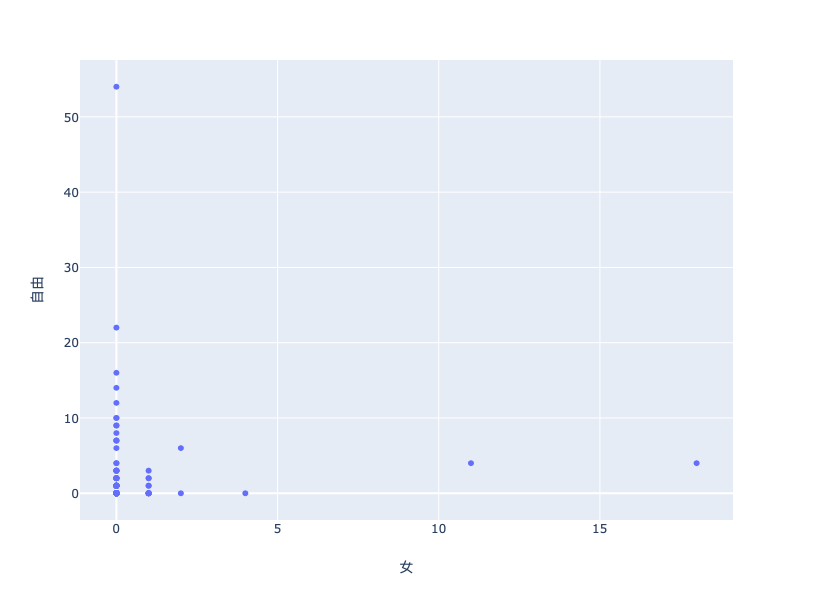

In [32]:
px.scatter(Meiroku_df, x='女', y='自由', hover_name='author')

In [33]:
mask = Meiroku_df.text.str.count('男') != 0
Meiroku_df['男'] = Meiroku_df.text.str.count('男')

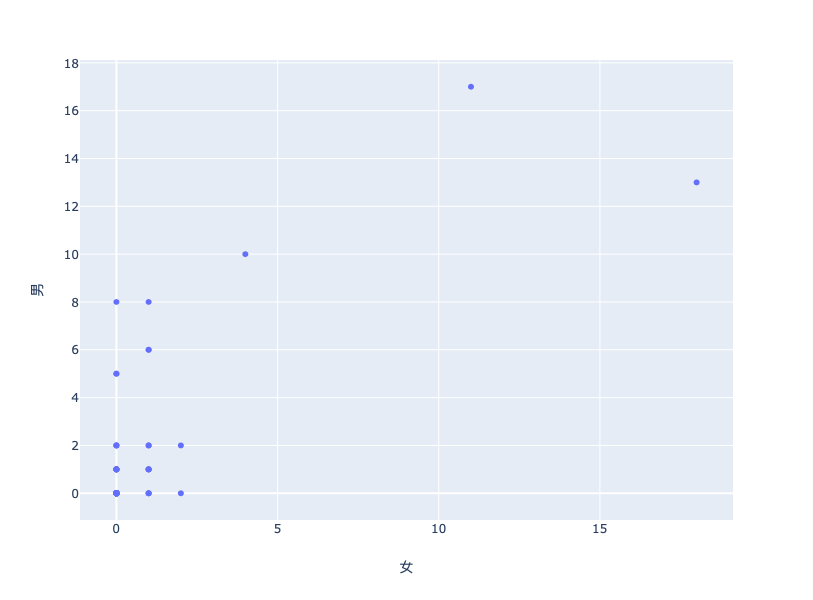

In [34]:
px.scatter(Meiroku_df, x='女', y='男', hover_name='author')

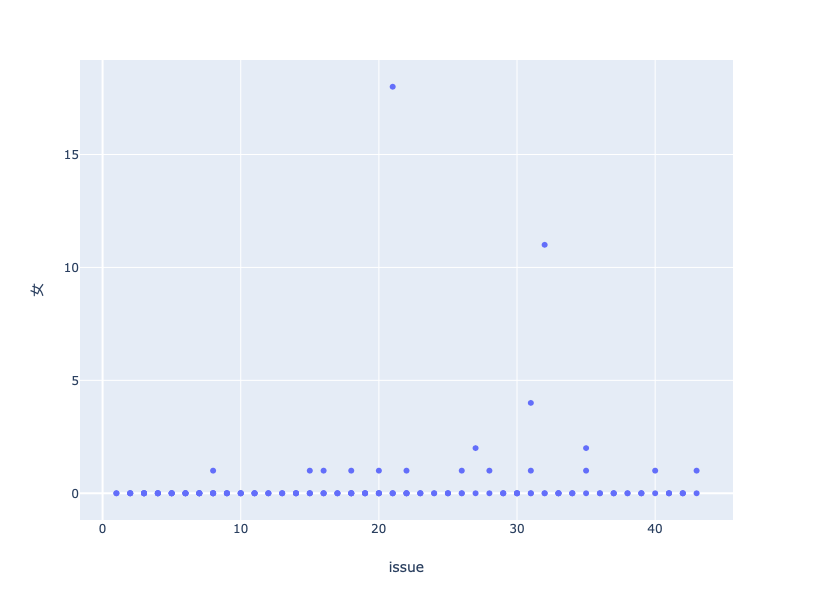

In [35]:
px.scatter(Meiroku_df, x='issue', y='女', hover_name='author')